# German credit data

신용평가모델

-대출 신청자 1000명의 샘플 데이터 => 실제 대출 승인여부 (good, bad)

It is worse to class a customer as good when they are bad,
than it is to class a customer as bad when they are good.

분석의 목적:
- 고객 데이터를 기반으로 => 이 사람의 대출 승인 여부를 판단하는 로직(기준)을 좀 알려줘.

종속변수(우리가 알고 싶은 결과):
- Risk(good, bad)

가설: 
=> 각각의 컬럼들이 -> Risk에 미치는 영향을 파악하면 -> 피처 엔지니어링에 활용 -> 모델링에 활용

EDA : 데이터를 보면서 종속 변수에 영향을 미치는 중요한 컬럼들을 발견하기 위해

(1) 저축계좌(적금계좌) / 예금계좌가 없거나 적은 사람은 신용에 문제가 있을 가능성이 높다.
(2) 대출목적 (TV) 신용에 문제가 있을 것이다.

In [1]:
import pandas as pd #To work with dataset
import numpy as np #Math library

import seaborn as sns #Graph library that use matplot in background
import matplotlib.pyplot as plt #to plot some parameters in seaborn

In [2]:
df = pd.read_csv('./german_credit.csv')
df

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,996,40,male,3,own,little,little,3857,30,car,good
997,997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,998,23,male,2,free,little,little,1845,45,radio/TV,bad


- Age: 나이 
- Sex: 성별
- Job: 직업 (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)
- Housing: 거주 형태(자가, 임대, 무상거주)
- Saving accounts: 저축 계좌 잔고
- Checking account: 입출금 계좌 잔고
- Credit amount: 대출 금액
- Duration: 대출 기간
- Purpose: 대출 목적
- Risk: 대출 위험도(상환 불이행 가능성)
- 
- Age (numeric)
- Sex (text: male, female)
- Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)
- Housing (text: own, rent, or free)
- Saving accounts (text - little, moderate, quite rich, rich)
- Checking account (numeric, in DM - Deutsch Mark)
- Credit amount (numeric, in DM)
- Duration (numeric, in month)
- Purpose(text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others
- Risk (Value target - Good or Bad Risk)

In [3]:
# Unnamed: 0 컬럼 제거
df.drop('Unnamed: 0', axis=1, inplace=True)
df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,40,male,3,own,little,little,3857,30,car,good
997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


In [7]:
df.corr() # 상관관계

# 공장데이터 분석을 하는 분이 계십니다.
# 제품에 영향을 주는 요소 컬럼이 100개가 넘어요. (소음크기(데시벨), 온도, 작업장온도, ) 
# -> 이걸 계산하고 제품에 영향을 주는 요소를 찾는 게 일.

,Age,Job,Credit amount,Duration
Age,1.000000,0.015673,0.032716,-0.036136
Job,0.015673,1.000000,0.285385,0.210910
Credit amount,0.032716,0.285385,1.000000,0.624984
Duration,-0.036136,0.210910,0.624984,1.000000


In [8]:
#해결해야할 문제를 코드로 쓰는건 하겠는데,
#무언가를 분석해야한다니 손도 대지 못했습니다.
#-> 분석의 목적을 정하지 않아서가 아닐까.
#걱정되네요.

# 목적과 목표는 제시를 해줍니다.
# 나는 각을 재면되요. 이 데이터로 -> 제안받은 목표를 달성할 수 있겠다, 없겠다.

# EDA(데이터 톺아보기) -> 찍먹.

# 일로 하게되면 손 못대는거보다 결과에 데이터를 껴맞추는게 더 많을거같은… => 정치싸움과 연결이 ....;;;

# 흔들림. 취업 제안. 
# 여기에 왜 들어왔는가? => 분석하고, ML하고 싶어서..! (어렵다 보니깐 포기하고 싶고 헷갈리기도 하거든요. 
# 중심을 잘잡아야지. 강사님들이랑 대화하고.) => 이전에 하던 직무가 또 중요한 포인트가 될 것 같긴해요.

In [10]:
df.isna().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [11]:
#질문1) null값이 존재할 경우 이를 전처리하지 않고 
#그냥 포함한 상태로 원시 데이터를 여러 시각적 분석을 하는 것이 
#전처리를 하고 시각화하는 것보다 유의미한 분석 방향인지가 궁금해졌습니다.
#=> 당연히 전처리를 해야죠.
# 데이터가 많아서 제거하기가 조금 힘들 것 같아.
# null 값이 주는 의미는 없죠 => 피처 엔지어링, 모델링.
# null: 처리를 하긴 해야해.
# 커뮤니케이션 상대가 있으면 대화로 풀면되요.

#질문2) 값을 대치하려면 정확성을 좀 포기하더라도 어떤 판단 기준?
#(가령 saving accounts가 little 비중이 많으니)에 따라 
#null값을 그냥 little로 주자 하지만 이러면 데이터가 너무 편향되는 문제가 생깁니다. 
#그럼에도 이런 기준에 따른 큰 분류로 null값을 채우는게 맞나요? 
#아니면 세세한 판단을 세워서 더 디테일하게 null값을 채워가야하나요?

# 실제로 데이터를 내가 생각하는 값을 입력한 다음에 -> 분석을 해보면 되죠.
# 정답이 없는게 => 지금 분석한 데이터 + 후속 데이터
# 선민님 처럼 생각하실수도 있죠. => 대화 상대가 필요하다. 문제를 해결할.

In [14]:
# 컬럼에서의 유니크한 값들
df.nunique() # 각 컬럼의 유니크한 갯수를 반환
df['Job'].unique()

AttributeError: 'DataFrame' object has no attribute 'unique'

In [15]:
df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [20]:
def unique_value(data, column):
    return data[column].nunique()

print(unique_value(df, list(df.columns)))

Age                  53
Sex                   2
Job                   4
Housing               3
Saving accounts       4
Checking account      3
Credit amount       921
Duration             33
Purpose               8
Risk                  2
dtype: int64


In [21]:
def missing_value_table(df):
    missing_value = df.isna().sum().sort_values(ascending=False)
    missing_value_percent = 100 * df.isna().sum()//len(df)
    missing_value_table = pd.concat([missing_value, missing_value_percent], axis=1)
    missing_value_table_return = missing_value_table.rename(columns = {0 : 'Missing Values', 1 : '% Value'})
    cm = sns.light_palette("lightgreen", as_cmap=True)
    missing_value_table_return = missing_value_table_return.style.background_gradient(cmap=cm)
    return missing_value_table_return
  
missing_value_table(df)

,Missing Values,% Value
Checking account,394,39
Saving accounts,183,18
Age,0,0
Sex,0,0
Job,0,0
Housing,0,0
Credit amount,0,0
Duration,0,0
Purpose,0,0
Risk,0,0


In [22]:
df['Checking account'].value_counts()

little      274
moderate    269
rich         63
Name: Checking account, dtype: int64

In [25]:
df['Saving accounts'].value_counts(dropna=False)

little        603
NaN           183
moderate      103
quite rich     63
rich           48
Name: Saving accounts, dtype: int64

In [28]:
df.groupby(['Sex', 'Checking account']).size() # unstack: index값을 컬럼으로.

Sex     Checking account
female  little               88
        moderate             86
        rich                 20
male    little              186
        moderate            183
        rich                 43
dtype: int64

In [29]:
df.groupby(['Sex', 'Checking account']).size().unstack() # unstack: index값을 컬럼으로.

Checking account,little,moderate,rich
Sex,,,
female,88,86,20
male,186,183,43


/Users/inseop/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/inseop/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/inseop/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

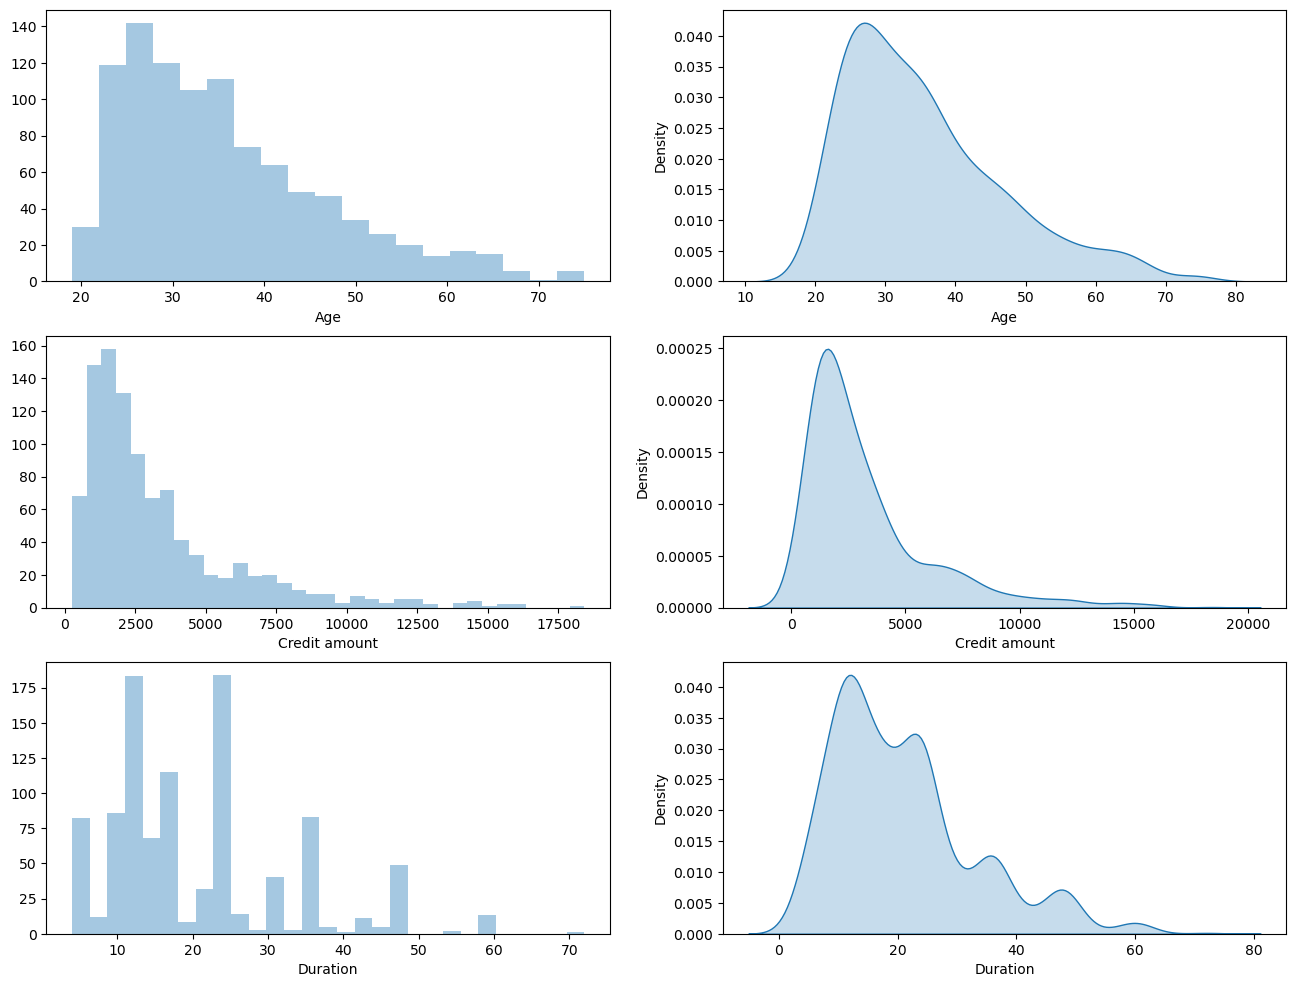

In [37]:
import seaborn as sns
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(16,12))
category = ["Age", "Credit amount", "Duration"]

count = 0
for i in range(3):
    sns.distplot(df[category[count]], ax=ax[i][0], kde=False)
    sns.kdeplot(df[category[count]], ax=ax[i][1], shade=True)
    count += 1

In [39]:
new_df = df[['Duration', 'Credit amount', 'Age']]
new_df.corr()

,Duration,Credit amount,Age
Duration,1.000000,0.624984,-0.036136
Credit amount,0.624984,1.000000,0.032716
Age,-0.036136,0.032716,1.000000


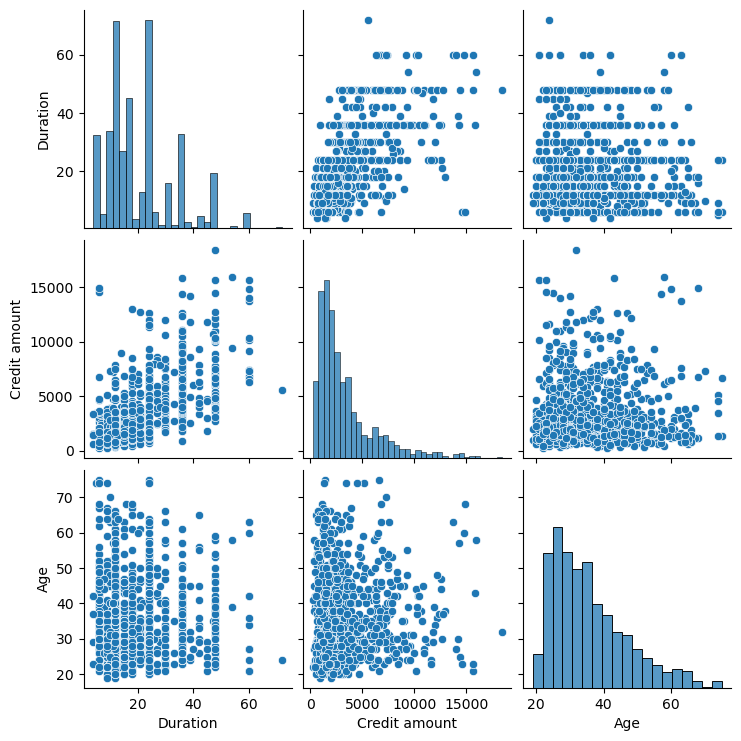

In [40]:
sns.pairplot(new_df)

<AxesSubplot:>

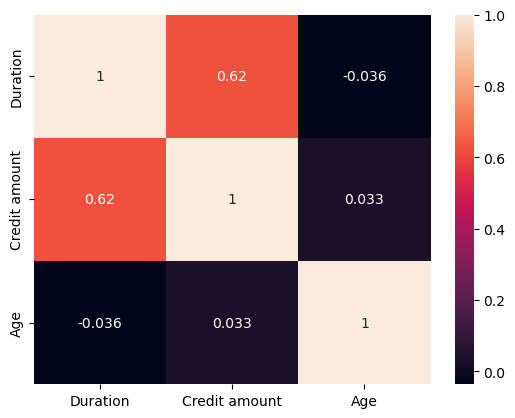

In [41]:
sns.heatmap(new_df.corr(), annot=True)

<AxesSubplot:xlabel='Age', ylabel='Credit amount'>

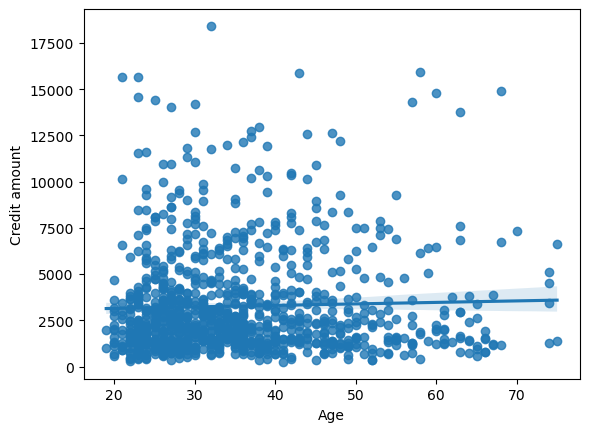

In [45]:
sns.regplot(x='Age', y='Credit amount', data=new_df)

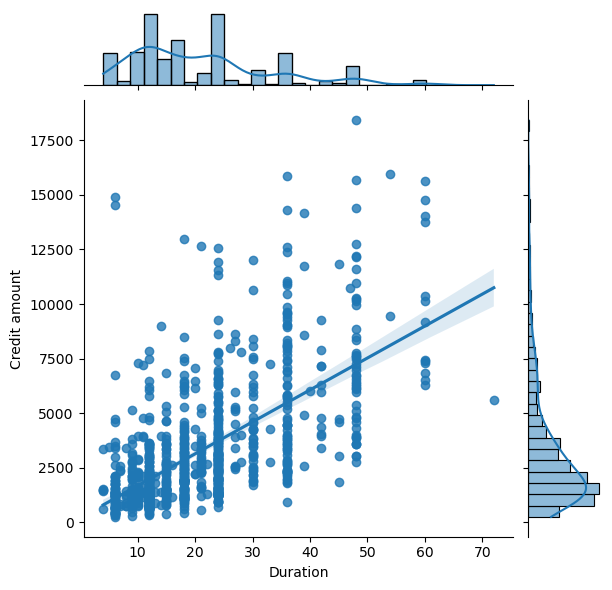

In [46]:
sns.jointplot(x='Duration', y='Credit amount', data=new_df, kind='reg')

In [48]:
import plotly.offline as py 
import plotly.graph_objs as go # it's like "plt" of matplot
import plotly.tools as tls # It's useful to we get some tools of plotly
import warnings # This library will be used to ignore some warnings
from collections import Counter # To do counter of some features

trace0 = go.Bar(
            x = df[df["Risk"]== 'good']["Risk"].value_counts().index.values,
            y = df[df["Risk"]== 'good']["Risk"].value_counts().values,
            name='Good credit'
    )

trace1 = go.Bar(
            x = df[df["Risk"]== 'bad']["Risk"].value_counts().index.values,
            y = df[df["Risk"]== 'bad']["Risk"].value_counts().values,
            name='Bad credit'
    )

data = [trace0, trace1]

layout = go.Layout(
    yaxis=dict(
        title='Count'
    ),
    xaxis=dict(
        title='Risk Variable'
    ),
    title='Target variable distribution'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='grouped-bar')

In [49]:
df_good = df.loc[df["Risk"] == 'good']['Age'].values.tolist()
df_bad = df.loc[df["Risk"] == 'bad']['Age'].values.tolist()
df_age = df['Age'].values.tolist()

#First plot
trace0 = go.Histogram(
    x=df_good,
    histnorm='probability',
    name="Good Credit"
)
#Second plot
trace1 = go.Histogram(
    x=df_bad,
    histnorm='probability',
    name="Bad Credit"
)
#Third plot
trace2 = go.Histogram(
    x=df_age,
    histnorm='probability',
    name="Overall Age"
)

#Creating the grid
fig = tls.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                          subplot_titles=('Good','Bad', 'General Distribuition'))

#setting the figs
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 2, 1)

fig['layout'].update(showlegend=True, title='Age Distribuition', bargap=0.1)
py.iplot(fig)

/Users/inseop/opt/anaconda3/lib/python3.9/site-packages/plotly/tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [50]:
#Let's look the Credit Amount column
interval = (18, 25, 35, 60, 120)

cats = ['Student', 'Young', 'Adult', 'Senior']
df["Age_cat"] = pd.cut(df.Age, interval, labels=cats)

df_good = df[df["Risk"] == 'good']
df_bad = df[df["Risk"] == 'bad']

In [51]:
trace0 = go.Box(
    y=df_good["Credit amount"],
    x=df_good["Age_cat"],
    name='Good credit',
    marker=dict(
        color='#3D9970'
    )
)

trace1 = go.Box(
    y=df_bad['Credit amount'],
    x=df_bad['Age_cat'],
    name='Bad credit',
    marker=dict(
        color='#FF4136'
    )
)
    
data = [trace0, trace1]

layout = go.Layout(
    yaxis=dict(
        title='Credit Amount (US Dollar)',
        zeroline=False
    ),
    xaxis=dict(
        title='Age Categorical'
    ),
    boxmode='group'
)
fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='box-age-cat')

In [52]:
#First plot
trace0 = go.Bar(
    x = df[df["Risk"]== 'good']["Housing"].value_counts().index.values,
    y = df[df["Risk"]== 'good']["Housing"].value_counts().values,
    name='Good credit'
)

#Second plot
trace1 = go.Bar(
    x = df[df["Risk"]== 'bad']["Housing"].value_counts().index.values,
    y = df[df["Risk"]== 'bad']["Housing"].value_counts().values,
    name="Bad Credit"
)

data = [trace0, trace1]

layout = go.Layout(
    title='Housing Distribuition'
)


fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='Housing-Grouped')

In [53]:
#First plot
trace0 = go.Bar(
    x = df[df["Risk"]== 'good']["Sex"].value_counts().index.values,
    y = df[df["Risk"]== 'good']["Sex"].value_counts().values,
    name='Good credit'
)

#First plot 2
trace1 = go.Bar(
    x = df[df["Risk"]== 'bad']["Sex"].value_counts().index.values,
    y = df[df["Risk"]== 'bad']["Sex"].value_counts().values,
    name="Bad Credit"
)

#Second plot
trace2 = go.Box(
    x = df[df["Risk"]== 'good']["Sex"],
    y = df[df["Risk"]== 'good']["Credit amount"],
    name=trace0.name
)

#Second plot 2
trace3 = go.Box(
    x = df[df["Risk"]== 'bad']["Sex"],
    y = df[df["Risk"]== 'bad']["Credit amount"],
    name=trace1.name
)

data = [trace0, trace1, trace2,trace3]


fig = tls.make_subplots(rows=1, cols=2, 
                        subplot_titles=('Sex Count', 'Credit Amount by Sex'))

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig.append_trace(trace3, 1, 2)

fig['layout'].update(height=400, width=800, title='Sex Distribuition', boxmode='group')
py.iplot(fig, filename='sex-subplot')

/Users/inseop/opt/anaconda3/lib/python3.9/site-packages/plotly/tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead

